# Перед тем как мы начнем

В двух словах про Python ^)

In [1]:
#это для комментов
# чтобы сделать RUN cntl+enter

print("Hello world")

Hello world


In [2]:
# Комментарий - про это переслушать в лекции
# Назначеие переменных

my_var = 30

In [4]:
if my_var > 3:
    print("This is more than 3, i said!")
else:
    print("Not yet")

This is more than 3, i said!


Можно писать функции которые делают что-то, а потом просто и быстро вызывать их любое количество раз! 

In [5]:
def my_function(x):
    if x > 25:
        print("This is good")
    elif x > 3:
        print("so so")
    else:
        print("Not yet")

In [6]:
my_function(100)

This is good


# Разведочное исследование и поиск аномалий

У нас есть датасет с сотрудниками и некоторой информацией по ним. 

Задача: базово понять фактуру по этому датасету в течение короткого периода времени (20-30 минут), прикинуть какие-то направления для дальнейшего исследования.  

Исходный csv-файл взят отсюда:

https://www.kaggle.com/rhuebner/human-resources-data-set?select=HRDataset_v14.csv

In [7]:
# Импортируем первую библиотеку для работы с данными Pandas
import pandas as pd

In [8]:
# Загрузим CSV-файл с данными (CSV-файл должен лежать рядом с исполняемым блокнотом)
df_hr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Существуют также методы для забора данных из Excel-файлов и БД

In [10]:
# Частично отрисуем этот датасет на экран
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [15]:
"""

По умолчанию Pandas ограничивает датасеты при отрисовке, заменяя срединные значения в строках и столбцах на "...", 
чтобы в случае слишком большого датасета у вас был шанс его загрузить и отрбразить на экране без поломки. 

Причина -- отображение данных графически занимает гораздо больше ресурсов компьютера, чем математическая работа с ними. 
Учитывайте это при работе с большими датасетами.

В данном конкретном случае нам известно, что количество столбцов (да и строк тоже) в нашем датасете не слишком большое, 
при этом нам хотелось бы увидеть на экране столбцы и значения в них. 
Для этого можем поменять настройку отображения датафрейма в Pandas

"""

pd.options.display.max_columns = 999

# Теперь количество столбцов, которое мы увидим при отображении дисплея будет гораздо больше (до 999)

In [114]:
df_hr.head()
# Убедимся, что столбцов теперь отбражается больше

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [116]:
pd.options.display.max_rows = 999
#не вышло увеличить количество строк

In [13]:
# Проверим датасет на наличие пустых значений при помощи метода .info()

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                


Мы проверили датасет на наличие пустых значений. 

Пустых значений не оказалось. Количество строк 1470 = количество значений по всем полям 1470


In [16]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [17]:
# Pandas имеет еще один волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


Давайте тут вспомним, что вообще такое коэффициент корреляции? От чего он зависит? О чем говорит? А о чем не говорит? В каких пределах измеряется? Какие значения КофКорр считаются значимыми? 

Мы видим заметную корреляцию Age и Job Level - 0,509 , а также Age и Monthly Income - 0.498, Age и Total working years - 0.680 (умеренная положительная связь). Выходит, что скорее всего, чем человек старше, с большей вероятностью он умеет выше уровень позиции, заработной платы и, конечно, тотально стаж работы у него большой.

Сильная корреляция и Job Level и Monthly Income - 0,950 - логично, что с уровнем позиции растет уровень заработной платы (сильная положительная связь). 

Также Job Level и Years at company - 0,534 - что также вполне логично и может прослеживаться взаимосвязь (умеренная положительная связь). Скорее всего люди, которые работают в компании долго, как правило, имеют промоушн.

Monthly Income и Total working years - 0,773 - сильная связь. То есть от получается, чем больше лет работает человек, тем скорее всего выше его уровень заработной платы.

От Performance рейтинга зависит PercentSalaryHike - 0,774. Сильная взаимосвязь. мы повышаем зп тем сотрудникам, которые имеют лучше результаты.

Интересно, что ВоркЛайф баланс не коррелируется ни с чем. 

А количество лет в компании имеет сильную корреляцию с количеством лет в той же роли - 0.759 (интересно, о какой роли речь, должность? роль как функция? Типа HR все время в компании? 

Количество лет в компании - также сильная взамосвязь с количеством лет с тем же рукоовдителем - 0.769. Команды стабильны, руководители часто не меняются, люди также не переходят из отдела в отдел.

А овт корреляция количество лет после последнего промоушена и кол-во лет в той же роли - не такая сильная (0.548), как можно было подумать. Вероятно, все же речь не о должности,а  о како-то другой роли. 

В полях "EmployeeCount" и "Standard hours" указано NaN - что вероятно говорит о том, что в этих полях для всех сотрудников значения одинаковые и анализ не имеет смысла.

In [22]:
# Проверим, сколько у нас уникальных значений в столбце.

df_hr['EducationField'].nunique()

6

In [24]:
# Теперь глянем, что это за образование такое?
df_hr['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

## Вопрос вопросов: 

Что, интересно, это за организация такая? 

In [32]:

# Возможно, какая-нибудь фарма - медицинские сотрудники, техники, которые обслуживают мед оборудование и маркетологи, которые все это пиарят. 
# Ну и конечно HR-ы, которые всем заправляют  
# Кто такие LIfe Science - не ясно


In [33]:
df_hr['TotalWorkingYears'].count()

1470

In [34]:
df_hr['TotalWorkingYears'].sum()

16581

In [38]:
# Значит у нас есть 1470 объектов со значением TotalWorkingYears "*" (любым) и совокупно они отработали 16 581 год 
# Из них 10 302 лет в нашей компании

In [36]:
df_hr['YearsAtCompany'].sum()

10302

In [39]:
# Чаще используется метод .head(), который возвращает только первые несколько строк (количество строк передается в скобках)
df_hr.head(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6


##  Сейчас будет чуть сложнее

In [40]:
# Определим типы данных в столбцах

df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Перед нами таблица с так называемыми "пандасовскими типами данных" внутри нашего DataFrame с названием df_hr, который в свою очередь сам является объектом типа DataFrame внутри вашей среды Python. 

Мощь и популярность Python во многом является следствием того, что в нем достаточно просто организовать структуры в объекты и создавать себе новые типы данных под конкретные задачи. В данном случае команда разработки Pandas уже придумала до нас какие типы данных могут нам потребоваться. 


Тут мы имеем: 
* int64 - тип данных в пандас - целое значение
* float64 - число с плавающей точкой 5.1 или 1.2 
* object - если есть хотя бы одно текстовое значение (или символы, которые пандас не понял)

## Важно: в Python (почти) всё является объектом

Далее займемся занимательным рисованием

In [41]:
# Импортируем библиотеки для рисования

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='MonthlyIncome'>

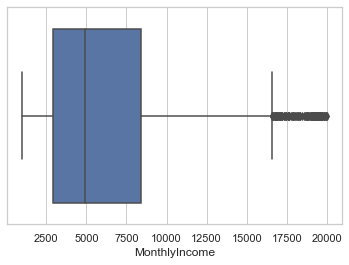

In [42]:
# Нарисуем боксплот для зарплат
sns.boxplot(x=df_hr["MonthlyIncome"])

In [53]:
# Здесь у нас также как и в примере на занятии распределение смещенное с выбросами справа
# Видим много выбросов за пределами "усов", то есть у нас много, а не единицы получают заработную платы гораздо сильно выше, чем большинство сотрудников (99%)

Text(0, 0.5, 'Amount of employees')

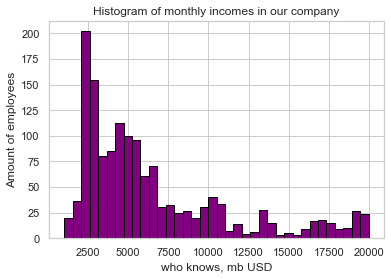

In [55]:
# matplotlib histogram
plt.hist(df_hr['MonthlyIncome'], color = 'purple', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of monthly incomes in our company')
plt.xlabel('who knows, mb USD')
plt.ylabel('Amount of employees')

In [ ]:
# Видим, что распределение похоже на Лог-нормальное, 
# но мы его еще не проходили, поэтому ничего по нему проверить не можем, 
# а просто степенно ждем пары по статистике. 

# А пока что движемся дальше. Импортируем еще одну чудную библиотеку -- Numpy!
# Она предназначена для базовых операций над числами при работе с выборками и лежит в основе Pandas

In [56]:
import numpy as np

In [46]:
# Среднее значение по зарплате
np.mean(df_hr.MonthlyIncome)

6502.931292517007

In [47]:
# А медиана? 
np.median(df_hr.MonthlyIncome)

4919.0

In [49]:
# Обращаем внимание что медиана ниже среднего значения на примерно 1500
# О чем это говорит? Снова о том, что нельзя мерить среднее по "больнице". Большая часть сотрудников в компании получают зп ниже среднего

### Никогда не забываем, что средних у нас как минимум 4 вида: 

#### Мода (ну типо даже не совсем среднее, но из той же оперы, поэтому тут)
Самое частовстречающееся значение в выборке. В выборке может быть больше 1, а может быть даже 0 мод. 

#### Арифметическое среднее (Average, also called the arithmetic mean)
is the sum of all the values divided by the number of values. 

#### Среднее значение (mean)

is the average in the given data. 
In statistics, the mean is equal to the total number of observations divided by the number of observations.


#### Среднее арифметическое взвешенное: 

Среднее арифметическое взвешенного набора чисел с учетом их "веса" (количества повторений).
Пример - центр массы самолета или температура итоговой смеси нескольких жидкостей с разными температурами. 

#### Медиана
Делит выборку на 2 равные части. Половина выборки находится до, а половина после медианы. Внутри самой выборки медианы может даже не существовать


In [50]:
# Variance (дисперсия) зарплат
np.var(df_hr.MonthlyIncome)

22149778.937456165

In [51]:
# Среднеквадратическое отклонение (также это корень из дисперсии)
np.std(df_hr.MonthlyIncome)

4706.355164823004

In [52]:
3*np.std(df_hr.MonthlyIncome)

14119.065494469012

In [76]:
# Как вы думаете, зачем нам может потребоваться три среднеквадратических отклонения?

# Сделаем подвыборку из выборки

In [122]:
# Выделим в отдельные массивы сотрудников с разными GenderID
df_hr_g1 = df_hr[df_hr['Department'] == 'Research & Development']
df_hr_g2 = df_hr[df_hr['Department'] == 'Sales']
df_hr_g3 = df_hr[df_hr['Department'] == 'Human Resources']

# И сразу проверим что сработало корректно
df_hr_g1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6


In [98]:
df_hr_g2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,1,Female,78,2,4,Manager,4,Married,15427,22021,2,Y,No,16,3,3,80,0,31,3,3,25,8,3,7
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
27,42,No,Travel_Rarely,691,Sales,8,4,Marketing,1,35,3,Male,48,3,2,Sales Executive,2,Married,6825,21173,0,Y,No,11,3,4,80,1,10,2,3,9,7,4,2
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,2,Female,83,3,5,Manager,1,Single,18947,22822,3,Y,No,12,3,4,80,0,22,2,2,2,2,2,1


In [121]:
df_hr_g3.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
79,46,No,Travel_Rarely,945,Human Resources,5,2,Medical,1,103,2,Male,80,3,2,Human Resources,2,Divorced,5021,10425,8,Y,Yes,22,4,4,80,1,16,2,3,4,2,0,2
100,37,Yes,Travel_Rarely,807,Human Resources,6,4,Human Resources,1,133,3,Male,63,3,1,Human Resources,1,Divorced,2073,23648,4,Y,Yes,22,4,4,80,0,7,3,3,3,2,0,2
105,59,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,140,3,Female,32,2,5,Manager,4,Married,18844,21922,9,Y,No,21,4,4,80,1,30,3,3,3,2,2,2
112,54,No,Non-Travel,142,Human Resources,26,3,Human Resources,1,148,4,Female,30,4,4,Manager,4,Single,17328,13871,2,Y,Yes,12,3,3,80,0,23,3,3,5,3,4,4
134,26,No,Travel_Rarely,1355,Human Resources,25,1,Life Sciences,1,177,3,Female,61,3,1,Human Resources,3,Married,2942,8916,1,Y,No,23,4,4,80,1,8,3,3,8,7,5,7


In [126]:
print("Count of Department = 'Research & Development'\
 is {} and for Department = 'Sales'\
 is {} and for Department = 'Human Resources' is {} ".format(len(df_hr_g1),
                                           len(df_hr_g2), 
                                           len(df_hr_g3),
                                           len(df_hr_g4)))

Count of Department = 'Research & Development' is 961 and for Department = 'Sales' is 446 and for Department = 'Human Resources' is 63 


In [127]:
print("Median of MonthlyIncome for Department = 'Research & Development' \
is {} and for Department = 'Sales' \
is {} and for Department = 'Human Resources' is {} ".format(np.median(df_hr_g1.MonthlyIncome),
                                           np.median(df_hr_g2.MonthlyIncome),
                                           np.median(df_hr_g3.MonthlyIncome)))

Median of MonthlyIncome for Department = 'Research & Development' is 4374.0 and for Department = 'Sales' is 5754.5 and for Department = 'Human Resources' is 3886.0 


<AxesSubplot:xlabel='MonthlyIncome'>

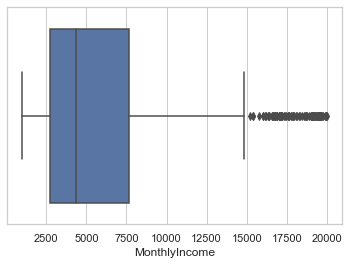

In [129]:
sns.boxplot(x=df_hr_g1["MonthlyIncome"])

<AxesSubplot:xlabel='MonthlyIncome'>

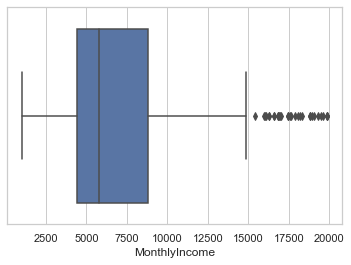

In [131]:
sns.boxplot(x=df_hr_g2["MonthlyIncome"])

<AxesSubplot:xlabel='MonthlyIncome'>

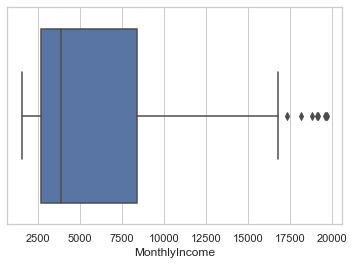

In [132]:
sns.boxplot(x=df_hr_g3["MonthlyIncome"])

Text(0, 0.5, 'Amount of employees')

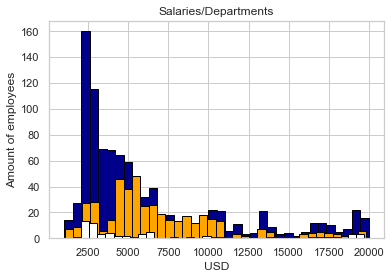

In [136]:
plt.hist(df_hr_g1['MonthlyIncome'], color = 'darkblue', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g2['MonthlyIncome'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g3['MonthlyIncome'], color = 'white', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Salaries/Departments')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [ ]:
# Видим, что хотя количество объектов и отличаются (высота столбиков),
# в самих распределениях нет особых различий

# Поиск аномальных значений

Для начала, определимся какие значения в принципе могут быть названы аномальными. 

Предположим, что это могут быть: 
* Сотрудники, у которых количество отсутствий больше, чем у 90% нашего персонала 
* Сотрудники, обладающие зарплатой значительно ниже или выше основной массы персонала


Классически "выбросами" считаются значения за пределами трех среднеквадратических отклонений от медианного значения в выборке. Можно быстро вывести их на экран банальным боксплотом и посмотреть есть они вообще или нет. Обычно в таком графике все "точки" за пределами "усов" "ящика" являются выбросами. 

К сожалению расчеты боксплотов могут отличаться в разных реализациях. 

In [144]:
# Эффективно выделим кусок данных через numpy where

df_hr['anomally_sal'] = np.where(
                            df_hr['MonthlyIncome'] > 
                            np.median(df_hr.MonthlyIncome) + 3*np.std(df_hr.MonthlyIncome),                 
                            1, 0)

In [145]:
df_anomally_sal = df_hr[df_hr['anomally_sal'] == 1]

df_anomally_sal

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_sal
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,3,Female,58,3,5,Manager,3,Divorced,19094,10735,4,Y,No,11,3,4,80,1,26,3,2,14,13,4,8,1
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,2,Female,49,3,5,Research Director,3,Married,19545,16280,1,Y,No,12,3,4,80,0,23,0,3,22,15,15,8,1
123,51,No,Travel_Rarely,684,Research & Development,6,3,Life Sciences,1,162,1,Male,51,3,5,Research Director,3,Single,19537,6462,7,Y,No,13,3,3,80,0,23,5,3,20,18,15,15,1
165,50,No,Travel_Rarely,1452,Research & Development,11,3,Life Sciences,1,226,3,Female,53,3,5,Manager,2,Single,19926,17053,3,Y,No,15,3,2,80,0,21,5,3,5,4,4,4,1
190,52,No,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,259,3,Male,65,2,5,Manager,3,Married,19999,5678,0,Y,No,14,3,1,80,1,34,5,3,33,18,11,9,1
231,42,No,Travel_Rarely,532,Research & Development,4,2,Technical Degree,1,319,3,Male,58,3,5,Manager,4,Married,19232,4933,1,Y,No,11,3,4,80,0,22,3,3,22,17,11,15,1
233,50,No,Travel_Rarely,854,Sales,1,4,Medical,1,323,4,Female,68,3,5,Manager,4,Divorced,19517,24118,3,Y,No,11,3,3,80,1,32,3,2,7,0,0,6,1
237,52,No,Non-Travel,771,Sales,2,4,Life Sciences,1,329,1,Male,79,2,5,Manager,3,Single,19068,21030,1,Y,Yes,18,3,4,80,0,33,2,4,33,7,15,12,1
244,45,No,Travel_Rarely,252,Research & Development,1,3,Other,1,336,3,Male,70,4,5,Manager,4,Married,19202,15970,0,Y,No,11,3,3,80,1,25,2,3,24,0,1,7,1
257,40,No,Travel_Rarely,1416,Research & Development,2,2,Medical,1,352,1,Male,49,3,5,Research Director,3,Divorced,19436,5949,0,Y,No,19,3,4,80,1,22,5,3,21,7,3,9,1


In [152]:
# 48 значений, если считать от медианы

## Оценка удаленности сотрудников от работы

In [153]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_sal
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.032653
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.177787
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


(array([419.,  84., 129.,  59.,  84., 165.,  86.,  49.,  19.,  21.,  58.,
         20.,  48.,  25.,  18.,  46.,  28.,  50.,  12.,  50.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ,
        16.4, 17.8, 19.2, 20.6, 22. , 23.4, 24.8, 26.2, 27.6, 29. ]),
 <BarContainer object of 20 artists>)

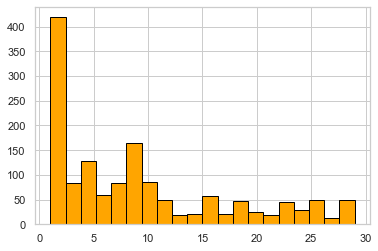

In [147]:
plt.hist(df_hr['DistanceFromHome'], color = 'orange', edgecolor = 'black', bins = 20)

Отсюда видно, что большинство сотрудников живут в 1-2 км от работы

Из метода .describe() выше нам известно, что 75-перцентиль находится на уровне 14 км от работы. Но есть и экстремальные значения, кто-то живет в удалении 29 км

Давайте также посчитаем где лежит 90-й перцентиль. 



In [154]:
df_hr.DistanceFromHome.quantile(q=0.9)

23.0

Это означает, что 90% сотрудников дивут в удалении 23 км.

Давайте объявим аномалиями все что выше этой отметки и выведем тех, кто живет дальше 23 км. 

In [155]:
df_hr_ab = df_hr[df_hr['DistanceFromHome'] > 23]
df_hr_ab

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_sal
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0,0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7,0
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,1,Male,31,3,1,Research Scientist,3,Divorced,2911,15170,1,Y,No,17,3,4,80,1,5,1,2,5,2,4,3,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3,0
42,26,Yes,Travel_Rarely,1357,Research & Development,25,3,Life Sciences,1,55,1,Male,48,1,1,Laboratory Technician,3,Single,2293,10558,1,Y,No,12,3,3,80,0,1,2,2,1,0,0,1,0
61,38,No,Travel_Frequently,653,Research & Development,29,5,Life Sciences,1,79,4,Female,50,3,2,Laboratory Technician,4,Single,2406,5456,1,Y,No,11,3,4,80,0,10,2,3,10,3,9,9,0
63,59,No,Travel_Rarely,1435,Sales,25,3,Life Sciences,1,81,1,Female,99,3,3,Sales Executive,1,Single,7637,2354,7,Y,No,11,3,4,80,0,28,3,2,21,16,7,9,0
112,54,No,Non-Travel,142,Human Resources,26,3,Human Resources,1,148,4,Female,30,4,4,Manager,4,Single,17328,13871,2,Y,Yes,12,3,3,80,0,23,3,3,5,3,4,4,0
119,43,No,Travel_Frequently,394,Sales,26,2,Life Sciences,1,158,3,Male,92,3,4,Manager,4,Married,16959,19494,1,Y,Yes,12,3,4,80,2,25,3,4,25,12,4,12,0
130,43,No,Travel_Frequently,957,Research & Development,28,3,Medical,1,171,2,Female,72,4,1,Research Scientist,3,Single,4739,16090,4,Y,No,12,3,4,80,0,18,2,3,3,2,1,2,0


In [156]:
df_hr_ab.count()

Age                         140
Attrition                   140
BusinessTravel              140
DailyRate                   140
Department                  140
DistanceFromHome            140
Education                   140
EducationField              140
EmployeeCount               140
EmployeeNumber              140
EnvironmentSatisfaction     140
Gender                      140
HourlyRate                  140
JobInvolvement              140
JobLevel                    140
JobRole                     140
JobSatisfaction             140
MaritalStatus               140
MonthlyIncome               140
MonthlyRate                 140
NumCompaniesWorked          140
Over18                      140
OverTime                    140
PercentSalaryHike           140
PerformanceRating           140
RelationshipSatisfaction    140
StandardHours               140
StockOptionLevel            140
TotalWorkingYears           140
TrainingTimesLastYear       140
WorkLifeBalance             140
YearsAtC

Получили 140 человек (вроде)

# Выводы по набору данных

Что мы сейчас обнаружили: 

1. Набор содержит информацию о 1470 сотрудниках.
2. Зарплаты по департаментам распределены неравномерно, меньше всех зарабатывают сотрудники HR (Следует задуматься о смене профессии) 
3. В основном в компании люди с большим опытом работы имеют более высокую зп
4. Уровень дохода чаще повышают людям с более высоким уровнем производительности
5. Ворк лайф баланс не коррелируется заметно с другими показателями вроде увроня удовлетворенности работой или окружающей средой
6. Сотрудники компании, как правило, стабильно работают с одним и тем же руководителем
7. Скорее всего речь идет о фарм компаниии, в которой наибольшее количество людей работает в продажах, второе по ччисленности подразделение - разработка продукта
8. Большинство сотрудников живет в пешей доступности от работы
9. Распределение по Monthly Income смещено вправо, то есть большинство сотрудников зарабатывает ниже среднего по компании. Возможно, также в компании много линейних должностей с базовыми зп сетками


# Выводы по заданию

Что мы сейчас сделали: 
1. Загрузили датасет
2. Провели по нему ряд базовых проверок
3. Научились считать базовые вещи - медиану, стандартное отклонение, дисперсию etc
4. Научились рисовать базовые графички с распределениями
5. Начились дробить датасеты по условию (делать подвыборки)

# В домашке вас ждет

* Сделайте все тоже самое, но на примере другого набора данных. На выходе должны получится достоверные результаты разведочного исследования (как в части "Выводы по набору данных")
* Превращаем знания в навыки

## Pro tip: 

* В ходе выполнения домашки вам может потребоваться итерация вопрос-ответ с коллегами или преподавателем. Начинайте делать домашку заранее, чтобы оставить в запасе больше времени на итерации вопрос-ответов и прояснение ситуации. Это работает не только с домашками. 